# 鳶尾花(Iris)品種的辨識

## 載入相關套件

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 載入資料集

In [61]:
ds = datasets.load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## 資料清理、資料探索與分析

In [3]:
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
ds.target_names

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<Axes: ylabel='count'>

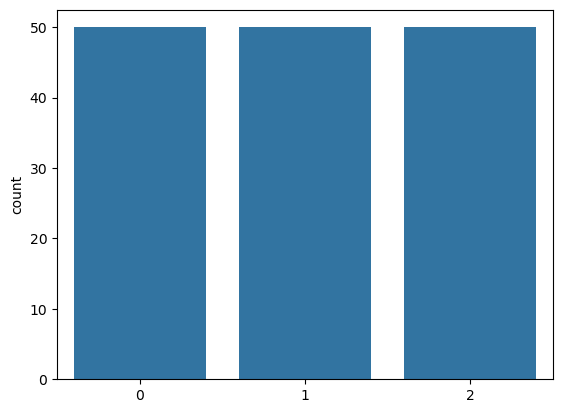

In [15]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y)

# 資料分割

In [45]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [46]:
y_train

array([0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2,
       0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1,
       0, 2, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2,
       2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 1, 0, 2, 2, 1])

# 特徵縮放

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 選擇演算法

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [50]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [51]:
y_pred = clf.predict(X_test_std)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0])

In [53]:
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

96.67%


In [54]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


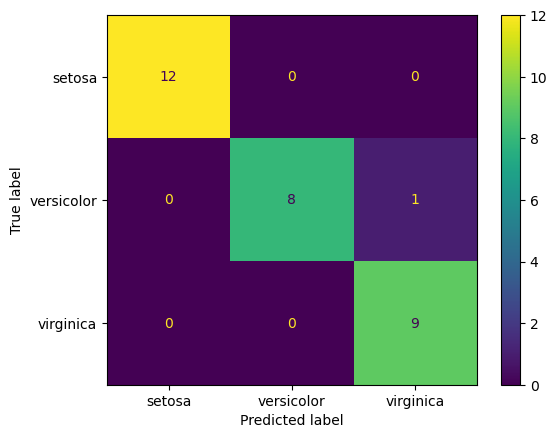

In [55]:
# 混淆矩陣圖
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 群集

In [ ]:
from sklearn import datasets

# 載入資料集

In [66]:
X = datasets.load_iris()
X = X.data

## 選擇演算法

In [59]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')

In [67]:
model.fit(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [68]:
y_pred = model.predict(X)

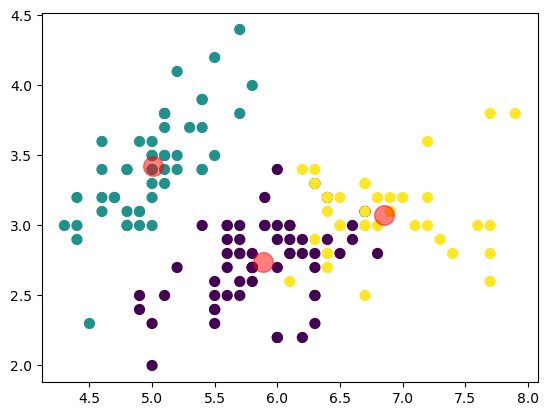

In [69]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Importing NumPy

In [70]:
import numpy as np

NumPy陣列是我們在課程中將使用NumPy的主要方式。NumPy陣列基本上有兩種類型：向量和矩陣。向量是嚴格的一維（1D）陣列，而矩陣是二維的（但你應該注意，矩陣仍然可以只有一行或一列）。

## 為什麼使用Numpy陣列？為什麼不只是使用列表？

使用Numpy陣列而不是“標準”Python列表對我們來說有很多原因。我們的主要原因包括：
* Numpy陣列的內存效率比列表高
* 能夠輕鬆擴展到N維對象
* Numpy陣列的計算速度快
* 使用Numpy進行廣播操作和函數
* 我們使用的所有數據科學和機器學習庫都是使用Numpy構建的

## Numpy陣列可以做什麼的簡單示例

這是使用Numpy陣列的一個簡單示例，它可以做到什麼程度。

In [74]:
my_list = [1,2,3]
my_array = np.array([1,2,3])
print(my_list)
print(my_array)
print(type(my_array))
print(my_array.dtype)

[1, 2, 3]
[1 2 3]
<class 'numpy.ndarray'>
int32


In [82]:
my_list = [1,2,3]
my_array = np.array([1,2,3],dtype='int32')
print(my_array.dtype)

int32


In [99]:
testFlot =  np.array([1.123456789,3.7,5.1])
print(testFlot)
print(testFlot.dtype)
arr_float32 =  testFlot.astype(np.float32)
print(arr_float32)
print(arr_float32.dtype)

[1.12345679 3.7        5.1       ]
float64
[1.1234568 3.7       5.1      ]
float32
